In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("diabetes.csv") 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


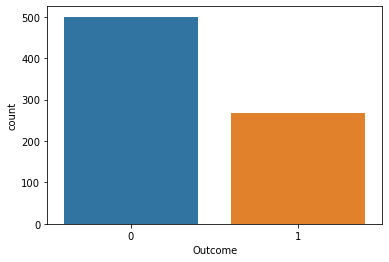

In [4]:
sns.countplot(x = "Outcome", data = df);

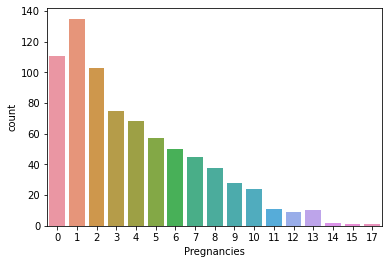

In [5]:
sns.countplot(x = "Pregnancies", data = df);

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
df.fillna(df.mean(), inplace = True) #Filled Mising values with Mean 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

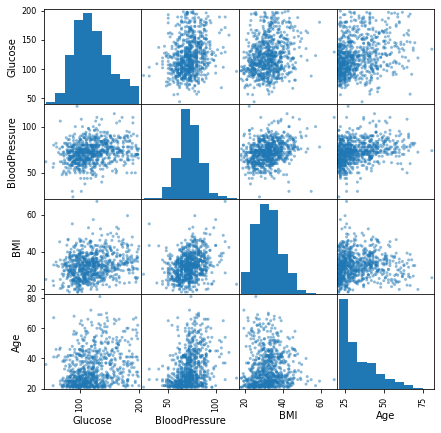

In [13]:
scatter_matrix(df[['Glucose', 'BloodPressure','BMI', 'Age']], figsize=(7, 7));

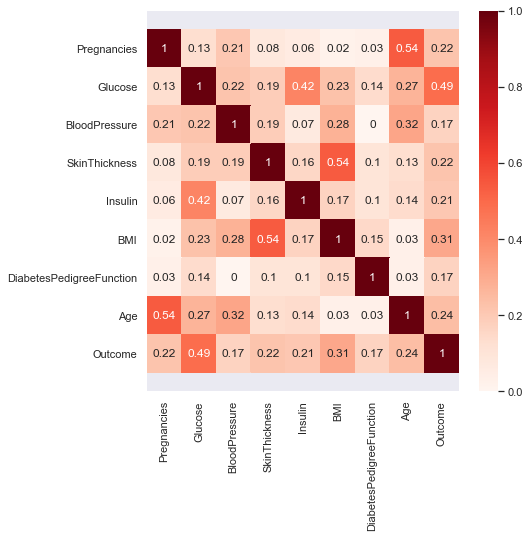

In [14]:
correlation_matrix = np.absolute(df.corr().round(2)) 
sns.set(rc={'figure.figsize':(7,7)})
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Reds') 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [15]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz

In [16]:
x = df.loc[:,'Pregnancies':'Age'] 
y = df['Outcome']

In [17]:
# Step 1
model = DecisionTreeClassifier(random_state=0, max_depth = 3)

In [18]:
model.fit(x, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [19]:
export_graphviz(model, out_file='diabetes_tree.dot', 
                feature_names = x.columns,
                class_names = ['Diabetes','NOT diabetes'], 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [23]:
from subprocess import call
call(['dot', '-Tpng', 'diabetes_tree.dot', '-o', 'diabetes_tree.png', '-Gdpi=600']);

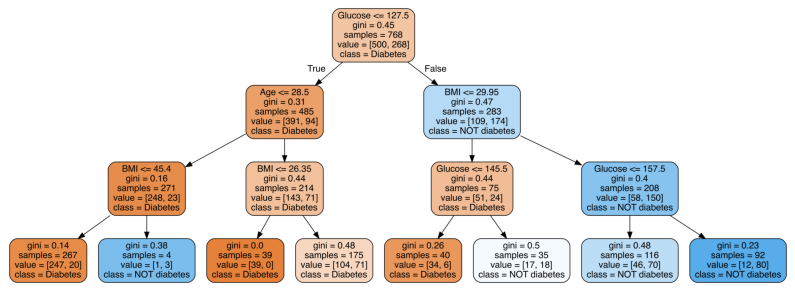

In [24]:
plt.figure(figsize = (14, 20)) 
plt.imshow(plt.imread('diabetes_tree.png')) 
plt.axis('off');
plt.show();

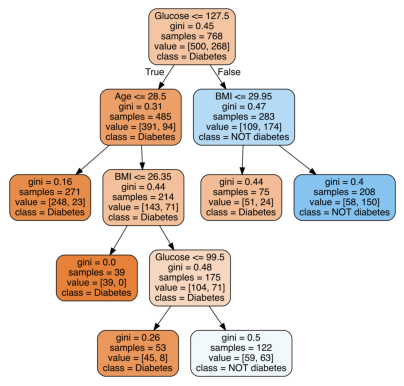

In [25]:
#step 2
model = DecisionTreeClassifier(random_state=0, max_depth = 6, ccp_alpha = 0.01) 
model.fit(x, y)
export_graphviz(model, out_file='diabetes_tree.dot',
                feature_names = x.columns,
                class_names = ['Diabetes','NOT diabetes'], 
                rounded = True, proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'diabetes_tree.dot', '-o', 'diabetes_tree.png', '-Gdpi=600']); 
plt.figure(figsize = (7, 7))
plt.imshow(plt.imread('diabetes_tree.png'))
plt.axis('off');
plt.show();

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [27]:
rfc = RandomForestClassifier() 
rfc.fit(x_train,y_train) 
rfc.score(x_test,y_test)

0.7987012987012987

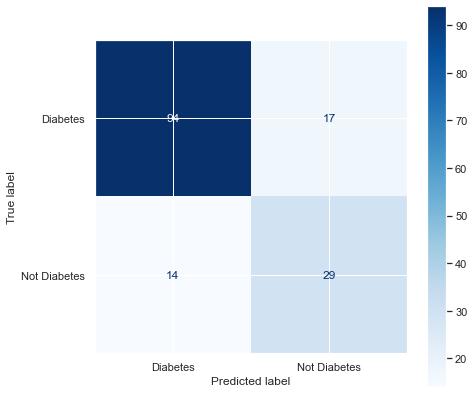

In [28]:
plot_confusion_matrix(rfc, x_test, y_test,display_labels=['Diabetes','Not Diabetes'], cmap=plt.cm.Blues,) 
plt.show()

In [29]:
dtc = DecisionTreeClassifier(random_state=0) 
dtc.fit(x_train, y_train)
dtc.score(x_test, y_test)

0.7467532467532467

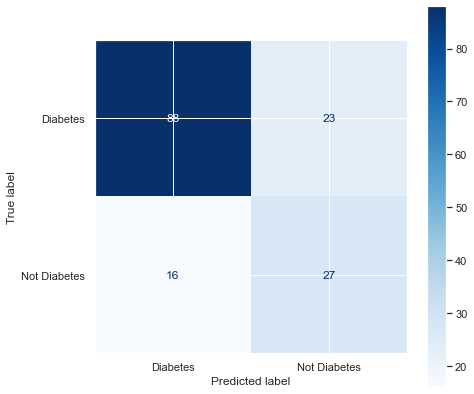

In [30]:
plot_confusion_matrix(dtc, x_test, y_test,display_labels=['Diabetes','Not Diabetes'], cmap=plt.cm.Blues,) 
plt.show()

In [31]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


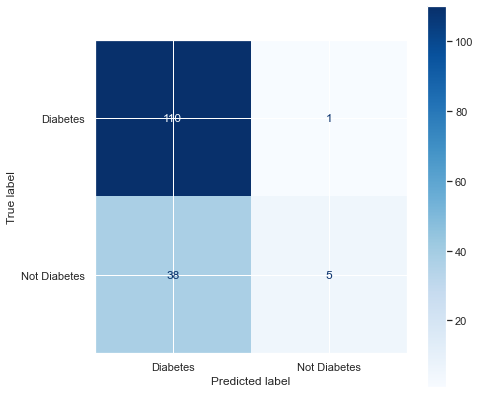

0.7467532467532467


In [32]:
rfc = RandomForestClassifier(ccp_alpha = 0.04, criterion = 'entropy', max_depth = 8, max_leaf_nodes = 2 ) 
rfc.fit(x_train,y_train)
plot_confusion_matrix(rfc, x_test, y_test,display_labels=['Diabetes','Not Diabetes'], cmap=plt.cm.Blues,) 
plt.show()
print(rfc.score(x_test, y_test))

In [33]:
param_grid = [
    {'ccp_alpha':[0.0, 0.005, 0.007, 0.01, 0.015, 0.02, 0.03, 0.05, 0.1], 
     'criterion':['gini', 'entropy'],
     'max_depth': [2,3,4,5,6,7,8,9],
     'max_leaf_nodes' : [2,3,4,5,6,7,8,9]}
]

In [34]:
clf = GridSearchCV(estimator=rfc, 
                   param_grid=param_grid)
best_model= clf.fit(x_train,y_train)

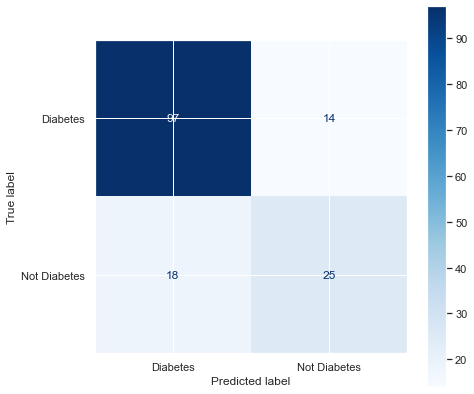

In [35]:
plot_confusion_matrix(best_model, x_test, y_test,display_labels=['Diabetes','Not Diabetes'], cmap=plt.cm.Blues,) 
plt.show()

In [36]:
print(best_model.score(x_test, y_test))

0.7922077922077922
